In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
from scipy.stats import norm

In [2]:
train = pd.read_csv('input/train.csv')
test = pd.read_csv('input/test.csv')
test_id = test['Id']

In [3]:
train.shape

(1460, 81)

In [4]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
target_variable = 'SalePrice'

In [6]:
train[target_variable].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [7]:
train.drop("Id", axis = 1, inplace = True)
test.drop("Id", axis = 1, inplace = True)

In [8]:
print("\nThe train data size after dropping Id feature is : {} ".format(train.shape)) 
print("The test data size after dropping Id feature is : {} ".format(test.shape))


The train data size after dropping Id feature is : (1460, 80) 
The test data size after dropping Id feature is : (1459, 79) 


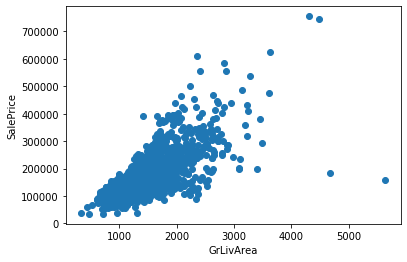

In [9]:
plt.ylabel(target_variable)
plt.xlabel('GrLivArea')
plt.scatter(train['GrLivArea'], train[target_variable])

In [10]:
train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index, inplace=True)
train.drop(train[(train['OverallQual']<5) & (train['SalePrice']>200000)].index, inplace=True)

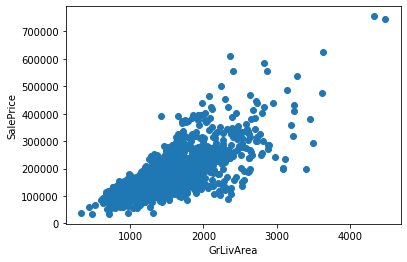

In [11]:
plt.ylabel(target_variable)
plt.xlabel('GrLivArea')
plt.scatter(train['GrLivArea'], train[target_variable])

Text(0, 0.5, 'Frequency')

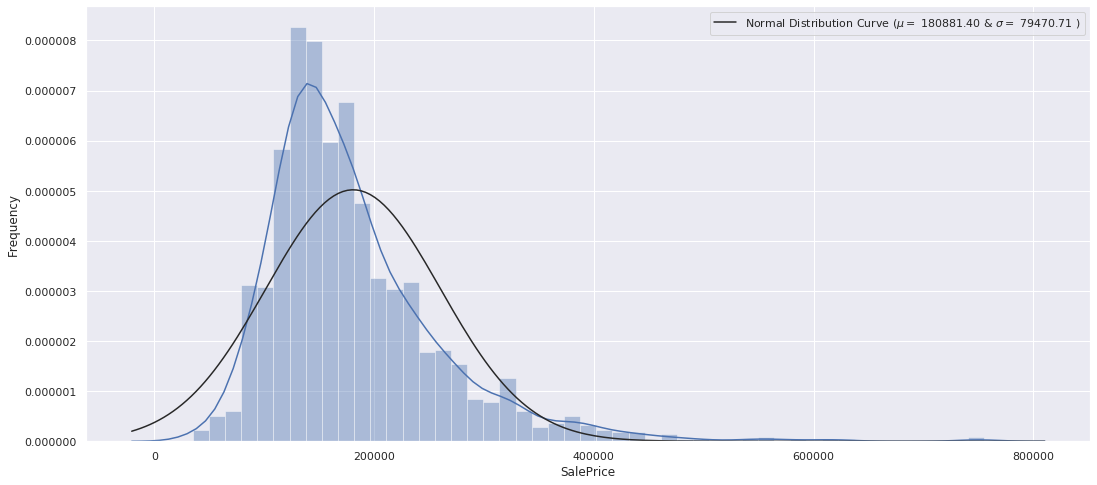

In [12]:
sb.set(rc={'figure.figsize':(18,8)})
(mu, sig) = norm.fit(train[target_variable])
sb.distplot(train[target_variable], fit=norm)
plt.legend(['Normal Distribution Curve ($\mu=$ {:.2f} & $\sigma=$ {:.2f} )'.format(mu, sig)])
plt.ylabel('Frequency')

In [13]:
print("Skewness of Sale Price is: ",train[target_variable].skew())

Skewness of Sale Price is:  1.88374941136315


Text(0, 0.5, 'Frequency')

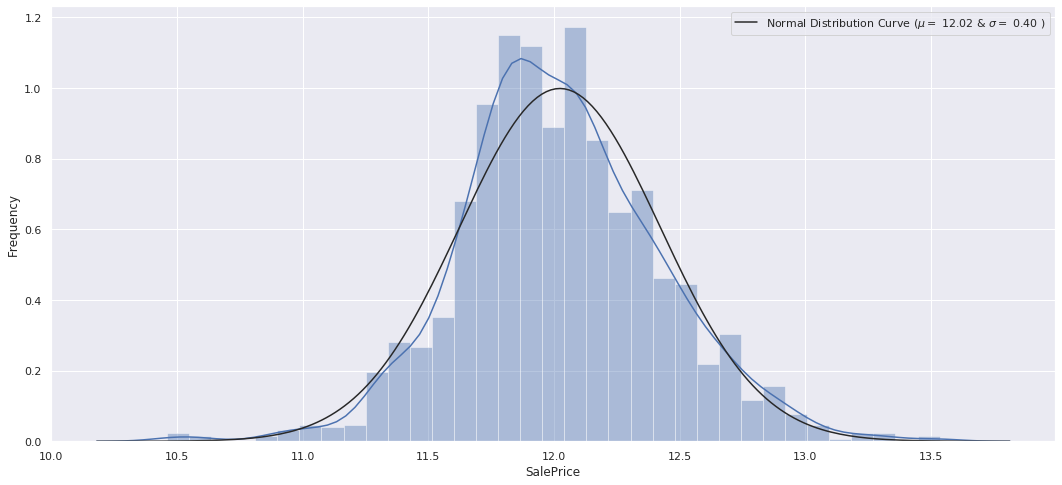

In [14]:
train["SalePrice"] = np.log1p(train[target_variable])
sb.set(rc={'figure.figsize':(18,8)})
(mu, sig) = norm.fit(train[target_variable])
sb.distplot(train[target_variable], fit=norm)
plt.legend(['Normal Distribution Curve ($\mu=$ {:.2f} & $\sigma=$ {:.2f} )'.format(mu, sig)])
plt.ylabel('Frequency')

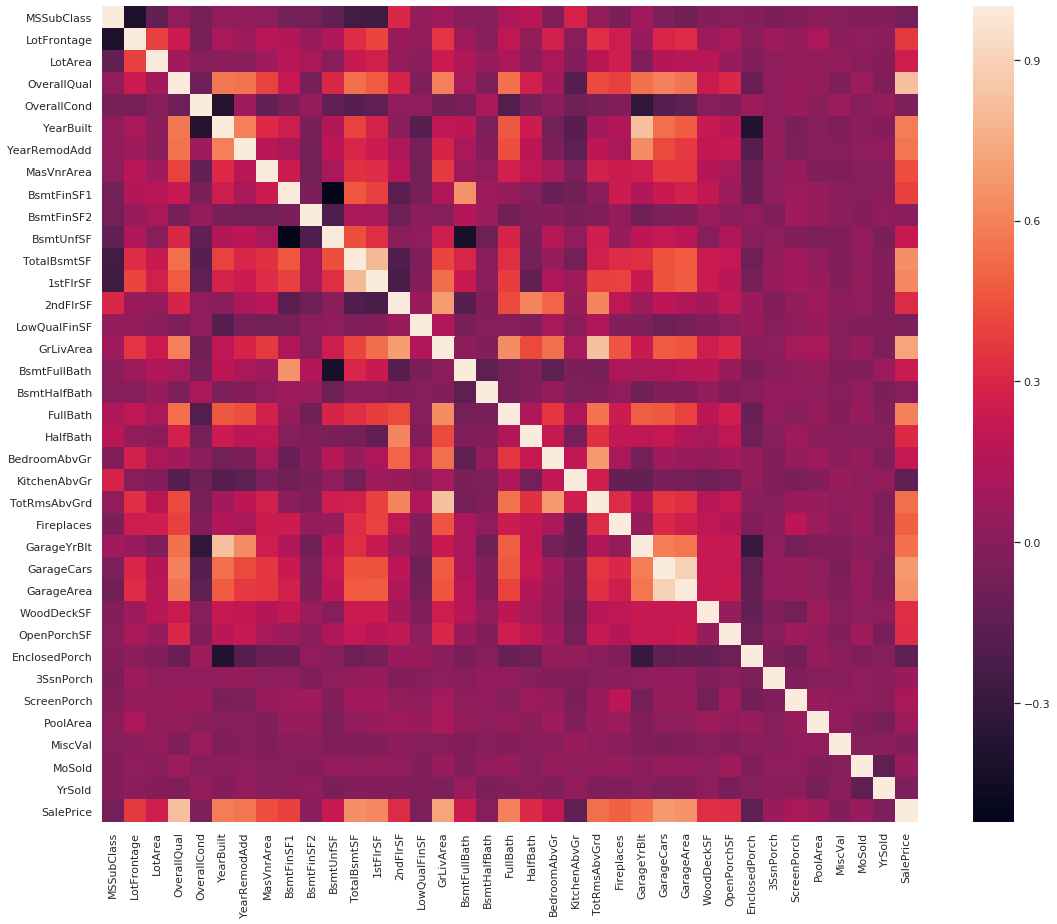

In [15]:
plt.subplots(figsize=(20,15))
sb.heatmap(train.corr(), square=True)

In [16]:
columns = ['OverallQual', 'GrLivArea', 'TotalBsmtSF','GarageCars', 'GarageArea','1stFlrSF', 'FullBath', 'YearBuilt','SalePrice']
#sb.pairplot(train[columns], size = 2)

In [17]:
ntrain = train.shape[0]
ntest = test.shape[0]
y_train = train.SalePrice.values
all_data = pd.concat([train, test]).reset_index(drop=True)
all_data.drop(['SalePrice'], axis=1, inplace=True)
print("all_data size is : {}".format(all_data.shape))

all_data size is : (2916, 79)


/home/kelvin/anaconda3/envs/tf/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  after removing the cwd from sys.path.


In [18]:
all_data_na = all_data.isnull().sum()
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({"Missing Values' count" :all_data_na})

Text(0, 0.5, 'Number of missing values')

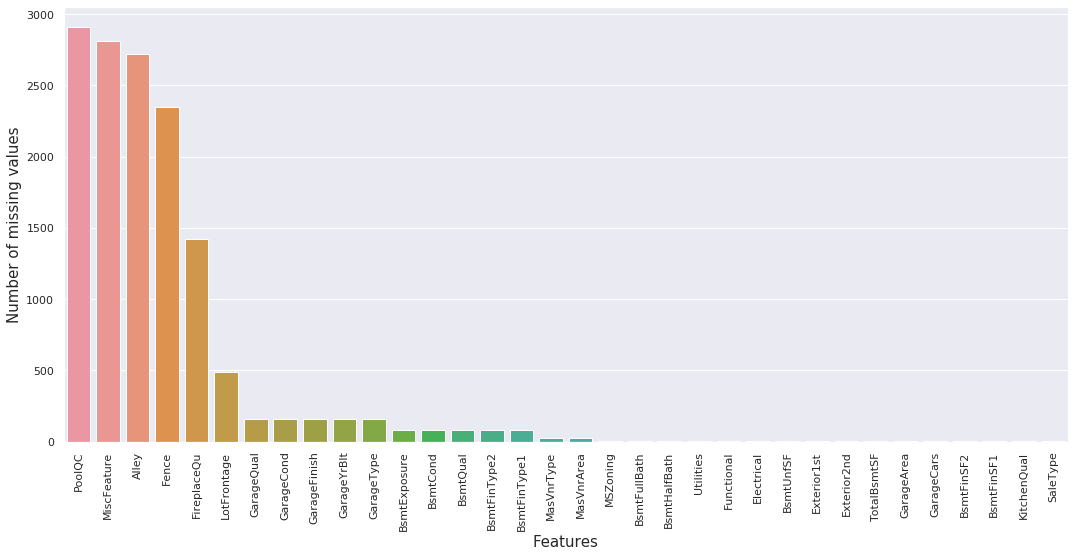

In [19]:
sb.barplot(x=all_data_na.index, y=all_data_na)
plt.xticks(rotation='90')
plt.xlabel('Features', fontsize=15)
plt.ylabel('Number of missing values', fontsize=15)

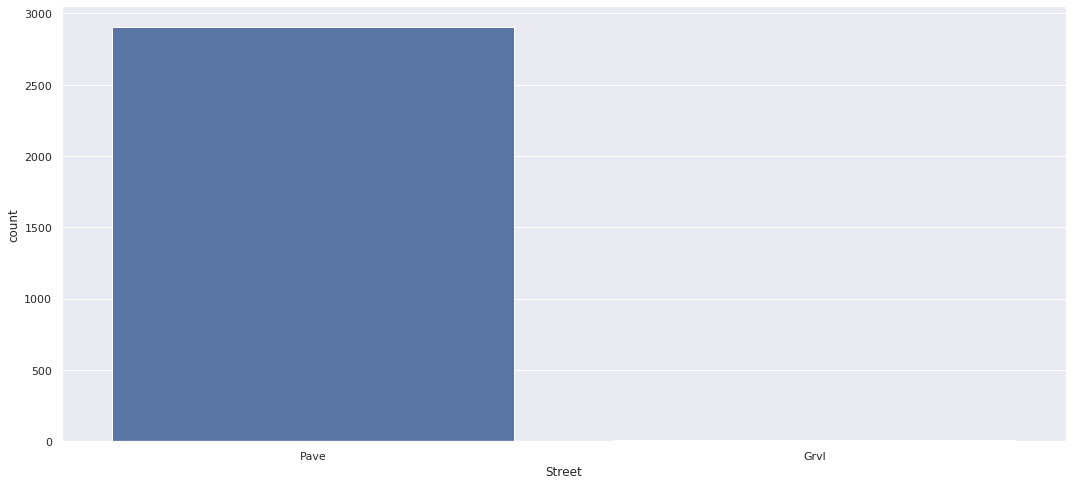

In [20]:
sb.countplot(x=all_data['Street'])

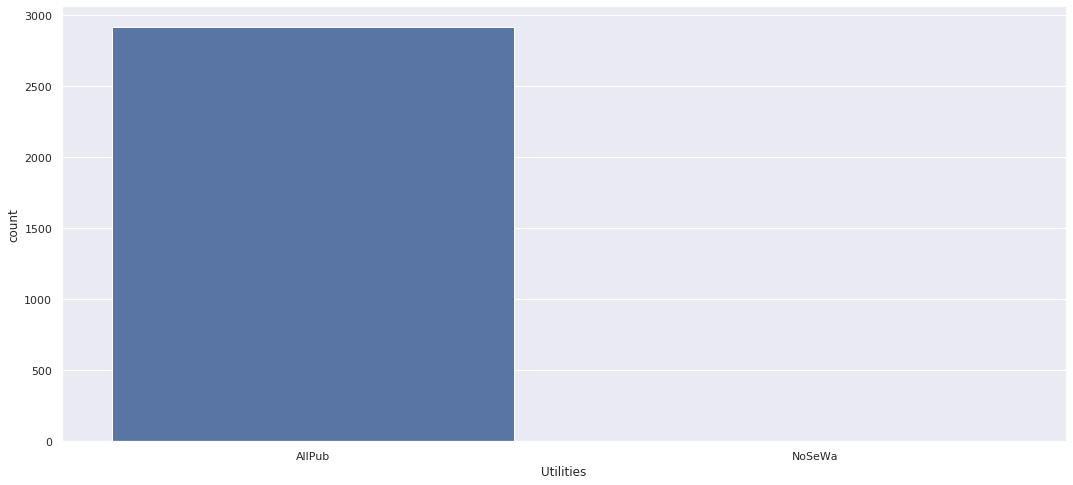

In [21]:
sb.countplot(x=all_data['Utilities'])

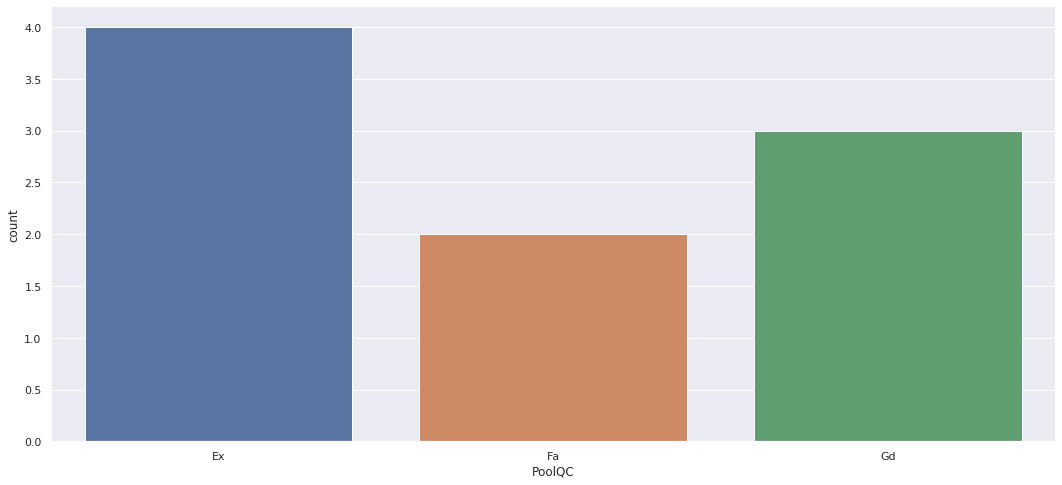

In [22]:
sb.countplot(x=all_data['PoolQC'])

In [23]:
all_data["MiscFeature"] = all_data["MiscFeature"].fillna("None")

In [24]:
all_data["Alley"] = all_data["Alley"].fillna("None")

In [25]:
all_data["Fence"] = all_data["Fence"].fillna("None")

In [26]:
all_data["FireplaceQu"] = all_data["FireplaceQu"].fillna("None")

In [27]:
all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

In [28]:
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    all_data[col] = all_data[col].fillna('None')

In [29]:
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    all_data[col] = all_data[col].fillna(0)

In [30]:
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    all_data[col] = all_data[col].fillna(0)


In [31]:
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    all_data[col] = all_data[col].fillna('None')

In [32]:
all_data["MasVnrType"] = all_data["MasVnrType"].fillna("None")
all_data["MasVnrArea"] = all_data["MasVnrArea"].fillna(0)
all_data["Functional"] = all_data["Functional"].fillna("Typ")  

In [33]:
all_data['MSZoning'] = all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])
all_data['Electrical'] = all_data['Electrical'].fillna(all_data['Electrical'].mode()[0])
all_data['KitchenQual'] = all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])
all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])
all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])
all_data['MSSubClass'] = all_data['MSSubClass'].fillna("None")
all_data['Utilities'] = all_data['Utilities'].fillna("None")
#Check remaining missing values if any 
all_data_na = all_data.isnull().sum()
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({"Missing Value' count" :all_data_na})
missing_data.head()

,Missing Value' count
PoolQC,2907


In [34]:
from scipy.stats import norm, skew

numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x)).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
MiscVal,21.935910
PoolArea,17.685603
LotArea,13.262550
LowQualFinSF,12.082427
3SsnPorch,11.370087
KitchenAbvGr,4.299698
BsmtFinSF2,4.143683
EnclosedPorch,4.001570
ScreenPorch,3.944305
BsmtHalfBath,3.929197


In [45]:
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    #all_data[feat] += 1
    all_data[feat] = boxcox1p(all_data[feat], lam)

There are 36 skewed numerical features to Box Cox transform


In [36]:
all_data['BsmtFinType1_Unf'] = 1*(all_data['BsmtFinType1'] == 'Unf')
all_data['HasWoodDeck'] = (all_data['WoodDeckSF'] == 0) * 1
all_data['HasOpenPorch'] = (all_data['OpenPorchSF'] == 0) * 1
all_data['HasEnclosedPorch'] = (all_data['EnclosedPorch'] == 0) * 1
all_data['Has3SsnPorch'] = (all_data['3SsnPorch'] == 0) * 1
all_data['HasScreenPorch'] = (all_data['ScreenPorch'] == 0) * 1
all_data['YearsSinceRemodel'] = all_data['YrSold'].astype(int) - all_data['YearRemodAdd'].astype(int)
all_data['Total_Home_Quality'] = all_data['OverallQual'] + all_data['OverallCond']
all_data = all_data.drop(['Utilities', 'Street', 'PoolQC',], axis=1)
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']
all_data['YrBltAndRemod'] = all_data['YearBuilt'] + all_data['YearRemodAdd']

all_data['Total_sqr_footage'] = (all_data['BsmtFinSF1'] + all_data['BsmtFinSF2'] +
                                 all_data['1stFlrSF'] + all_data['2ndFlrSF'])
all_data['Total_Bathrooms'] = (all_data['FullBath'] + (0.5 * all_data['HalfBath']) +
                               all_data['BsmtFullBath'] + (0.5 * all_data['BsmtHalfBath']))
all_data['Total_porch_sf'] = (all_data['OpenPorchSF'] + all_data['3SsnPorch'] +
                              all_data['EnclosedPorch'] + all_data['ScreenPorch'] +
                              all_data['WoodDeckSF'])
all_data['TotalBsmtSF'] = all_data['TotalBsmtSF'].apply(lambda x: np.exp(6) if x <= 0.0 else x)
all_data['2ndFlrSF'] = all_data['2ndFlrSF'].apply(lambda x: np.exp(6.5) if x <= 0.0 else x)
all_data['GarageArea'] = all_data['GarageArea'].apply(lambda x: np.exp(6) if x <= 0.0 else x)
all_data['GarageCars'] = all_data['GarageCars'].apply(lambda x: 0 if x <= 0.0 else x)
all_data['LotFrontage'] = all_data['LotFrontage'].apply(lambda x: np.exp(4.2) if x <= 0.0 else x)
all_data['MasVnrArea'] = all_data['MasVnrArea'].apply(lambda x: np.exp(4) if x <= 0.0 else x)
all_data['BsmtFinSF1'] = all_data['BsmtFinSF1'].apply(lambda x: np.exp(6.5) if x <= 0.0 else x)

all_data['haspool'] = all_data['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
all_data['has2ndfloor'] = all_data['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
all_data['hasgarage'] = all_data['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
all_data['hasbsmt'] = all_data['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
all_data['hasfireplace'] = all_data['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)



In [37]:
#MSSubClass=The building class
all_data['MSSubClass'] = all_data['MSSubClass'].apply(str)


#Changing OverallCond into a categorical variable
all_data['OverallCond'] = all_data['OverallCond'].astype(str)


#Year and month sold are transformed into categorical features.
all_data['YrSold'] = all_data['YrSold'].astype(str)
all_data['MoSold'] = all_data['MoSold'].astype(str)

In [38]:
all_data.columns

Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'Alley', 'BedroomAbvGr',
       'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtFinType1', 'BsmtFinType2', 'BsmtFullBath', 'BsmtHalfBath',
       'BsmtQual', 'BsmtUnfSF', 'CentralAir', 'Condition1', 'Condition2',
       'Electrical', 'EnclosedPorch', 'ExterCond', 'ExterQual', 'Exterior1st',
       'Exterior2nd', 'Fence', 'FireplaceQu', 'Fireplaces', 'Foundation',
       'FullBath', 'Functional', 'GarageArea', 'GarageCars', 'GarageCond',
       'GarageFinish', 'GarageQual', 'GarageType', 'GarageYrBlt', 'GrLivArea',
       'HalfBath', 'Heating', 'HeatingQC', 'HouseStyle', 'KitchenAbvGr',
       'KitchenQual', 'LandContour', 'LandSlope', 'LotArea', 'LotConfig',
       'LotFrontage', 'LotShape', 'LowQualFinSF', 'MSSubClass', 'MSZoning',
       'MasVnrArea', 'MasVnrType', 'MiscFeature', 'MiscVal', 'MoSold',
       'Neighborhood', 'OpenPorchSF', 'OverallCond', 'OverallQual',
       'PavedDrive', 'PoolArea', 'RoofMatl

In [48]:
from sklearn.preprocessing import LabelEncoder
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold', 'BldgType')
# process columns, apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(all_data[c].values)) 
    all_data[c] = lbl.transform(list(all_data[c].values))

# shape        
print('Shape all_data: {}'.format(all_data.shape))

Shape all_data: (2916, 94)


In [50]:
all_data = pd.get_dummies(all_data)
print(all_data.shape)

(2916, 231)


In [51]:
y_train.shape

(1457,)

In [52]:
train_val = all_data[:ntrain]
test_val = all_data[ntrain:]

In [53]:
test_val

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleCondition_Partial,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD
1457,1.573715,3.012763,0.0,1,0.634983,0,4,3,1.509698,1.380528,...,0,0,0,0,0,0,0,0,0,1
1458,1.610595,3.012763,0.0,1,0.730971,0,4,3,1.576541,0.000000,...,0,0,0,0,0,0,0,0,0,1
1459,1.577055,1.550030,0.0,1,0.730971,0,4,3,1.561760,0.000000,...,0,0,0,0,0,0,0,0,0,1
1460,1.576850,1.546765,0.0,1,0.730971,0,4,3,1.535036,0.000000,...,0,0,0,0,0,0,0,0,0,1
1461,1.607140,3.012763,0.0,1,0.634983,4,4,3,1.448905,0.000000,...,0,0,0,0,0,0,0,0,0,1
1462,1.558275,1.573289,0.0,1,0.730971,0,4,3,3.012763,0.000000,...,0,0,0,0,0,0,0,0,0,1
1463,1.600164,3.012763,0.0,1,0.730971,0,4,3,1.577768,0.000000,...,0,0,0,0,0,0,0,0,0,1
1464,1.561515,1.546475,0.0,1,0.730971,0,4,3,3.012763,0.000000,...,0,0,0,0,0,0,0,0,0,1
1465,1.611420,3.012763,0.0,1,0.634983,0,4,1,1.540629,0.000000,...,0,0,0,0,0,0,0,0,0,1
1466,1.572213,3.012763,0.0,1,0.634983,0,4,3,1.563332,1.304759,...,0,0,0,0,0,0,0,0,0,1


In [55]:
from sklearn.model_selection import KFold, cross_val_score, train_test_split


# Setup cross validation folds
kf = KFold(n_splits=12, random_state=42, shuffle=True)

In [79]:
from sklearn.metrics import mean_squared_error
# Define error metrics
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

def cv_rmse(model):
    rmse = np.sqrt(-cross_val_score(model, train_val.values, y_train, scoring="neg_mean_squared_error", cv=kf))
    return (rmse)

In [63]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge,ElasticNet,Lasso, RidgeCV, LassoCV, ElasticNetCV
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.kernel_ridge import KernelRidge
from mlxtend.regressor import StackingCVRegressor
from sklearn.svm import SVR
import xgboost as xgb
import lightgbm as lgb

In [59]:
lightgbm = lgb.LGBMRegressor(objective='regression', 
                       num_leaves=6,
                       learning_rate=0.01, 
                       n_estimators=7000,
                       max_bin=200, 
                       bagging_fraction=0.8,
                       bagging_freq=4, 
                       bagging_seed=8,
                       feature_fraction=0.2,
                       feature_fraction_seed=8,
                       min_sum_hessian_in_leaf = 11,
                       verbose=-1,
                       random_state=42)

# XGBoost Regressor
xgboost = xgb.XGBRegressor(learning_rate=0.01,
                       n_estimators=6000,
                       max_depth=4,
                       min_child_weight=0,
                       gamma=0.6,
                       subsample=0.7,
                       colsample_bytree=0.7,
                       objective='reg:linear',
                       nthread=-1,
                       scale_pos_weight=1,
                       seed=27,
                       reg_alpha=0.00006,
                       random_state=42)



In [60]:
# Ridge Regressor
ridge_alphas = [1e-15, 1e-10, 1e-8, 9e-4, 7e-4, 5e-4, 3e-4, 1e-4, 1e-3, 5e-2, 1e-2, 0.1, 0.3, 1, 3, 5, 10, 15, 18, 20, 30, 50, 75, 100]
ridge = make_pipeline(RobustScaler(), RidgeCV(alphas=ridge_alphas, cv=kf))

In [61]:
svr = make_pipeline(RobustScaler(), SVR(C= 20, epsilon= 0.008, gamma=0.0003))

In [64]:
gbr = GradientBoostingRegressor(n_estimators=6000,
                                learning_rate=0.01,
                                max_depth=4,
                                max_features='sqrt',
                                min_samples_leaf=15,
                                min_samples_split=10,
                                loss='huber',
                                random_state=42)  

# Random Forest Regressor
rf = RandomForestRegressor(n_estimators=1200,
                          max_depth=15,
                          min_samples_split=5,
                          min_samples_leaf=5,
                          max_features=None,
                          oob_score=True,
                          random_state=42)

# Stack up all the models above, optimized using xgboost
stack_gen = StackingCVRegressor(regressors=(xgboost, lightgbm, svr, ridge, gbr, rf),
                                meta_regressor=xgboost,
                                use_features_in_secondary=True)


In [65]:
scores = {}

score = cv_rmse(lightgbm)
print("lightgbm: {:.4f} ({:.4f})".format(score.mean(), score.std()))
scores['lgb'] = (score.mean(), score.std())

lightgbm: 0.1149 (0.0163)


In [66]:
score = cv_rmse(xgboost)
print("xgboost: {:.4f} ({:.4f})".format(score.mean(), score.std()))
scores['xgb'] = (score.mean(), score.std())

[00:21:05] WARNING: /workspace/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.
[00:21:51] WARNING: /workspace/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.
[00:22:35] WARNING: /workspace/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.
[00:23:21] WARNING: /workspace/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.
[00:24:06] WARNING: /workspace/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.
[00:24:51] WARNING: /workspace/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.
[00:25:37] WARNING: /workspace/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.
[00:26:26] WARNING: /workspace/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of re

In [67]:
score = cv_rmse(svr)
print("SVR: {:.4f} ({:.4f})".format(score.mean(), score.std()))
scores['svr'] = (score.mean(), score.std())


SVR: 0.1120 (0.0153)


In [68]:
score = cv_rmse(ridge)
print("ridge: {:.4f} ({:.4f})".format(score.mean(), score.std()))
scores['ridge'] = (score.mean(), score.std())

/home/kelvin/anaconda3/envs/tf/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.76811e-18): result may not be accurate.
  overwrite_a=True).T
/home/kelvin/anaconda3/envs/tf/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.82174e-18): result may not be accurate.
  overwrite_a=True).T
/home/kelvin/anaconda3/envs/tf/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.99573e-18): result may not be accurate.
  overwrite_a=True).T
/home/kelvin/anaconda3/envs/tf/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.82153e-18): result may not be accurate.
  overwrite_a=True).T
/home/kelvin/anaconda3/envs/tf/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.94639e-18): result may not be accurate.
  overw

/home/kelvin/anaconda3/envs/tf/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.82678e-18): result may not be accurate.
  overwrite_a=True).T
/home/kelvin/anaconda3/envs/tf/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.69743e-18): result may not be accurate.
  overwrite_a=True).T
/home/kelvin/anaconda3/envs/tf/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.81511e-18): result may not be accurate.
  overwrite_a=True).T
/home/kelvin/anaconda3/envs/tf/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.88812e-18): result may not be accurate.
  overwrite_a=True).T
/home/kelvin/anaconda3/envs/tf/lib/python3.6/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in 

/home/kelvin/anaconda3/envs/tf/lib/python3.6/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/home/kelvin/anaconda3/envs/tf/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.84145e-18): result may not be accurate.
  overwrite_a=True).T
/home/kelvin/anaconda3/envs/tf/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.88994e-18): result may not be accurate.
  overwrite_a=True).T
/home/kelvin/anaconda3/envs/tf/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.97914e-18): result may not be accurate.
  overwrite_a=True).T
/home/kelvin/anaconda3/envs/tf/lib/python3.6/site-packages/sklearn/linear

/home/kelvin/anaconda3/envs/tf/lib/python3.6/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/home/kelvin/anaconda3/envs/tf/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.80616e-18): result may not be accurate.
  overwrite_a=True).T
/home/kelvin/anaconda3/envs/tf/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.99722e-18): result may not be accurate.
  overwrite_a=True).T
/home/kelvin/anaconda3/envs/tf/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.90154e-18): result may not be accurate.
  overwrite_a=True).T
/home/kelvin/anaconda3/envs/tf/lib/python3.6/site-packages/sklearn/linear

ridge: 0.1128 (0.0146)


/home/kelvin/anaconda3/envs/tf/lib/python3.6/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [69]:
score = cv_rmse(rf)
print("rf: {:.4f} ({:.4f})".format(score.mean(), score.std()))
scores['rf'] = (score.mean(), score.std())

rf: 0.1378 (0.0141)


In [70]:
score = cv_rmse(gbr)
print("gbr: {:.4f} ({:.4f})".format(score.mean(), score.std()))
scores['gbr'] = (score.mean(), score.std())

gbr: 0.1120 (0.0164)


In [75]:
print('stack_gen')
stack_gen_model = stack_gen.fit(train_val.values, y_train)
print('lightgbm')
lgb_model_full_data = lightgbm.fit(train_val.values, y_train)
print('xgboost')
xgb_model_full_data = xgboost.fit(train_val.values, y_train)
print('Svr')
svr_model_full_data = svr.fit(train_val.values, y_train)
print('Ridge')
ridge_model_full_data = ridge.fit(train_val.values, y_train)
print('RandomForest')
rf_model_full_data = rf.fit(train_val.values, y_train)
print('GradientBoosting')
gbr_model_full_data = gbr.fit(train_val.values, y_train)

stack_gen
[00:47:39] WARNING: /workspace/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.
[00:48:23] WARNING: /workspace/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.
[00:49:10] WARNING: /workspace/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.
[00:49:56] WARNING: /workspace/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.
[00:50:43] WARNING: /workspace/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.


/home/kelvin/anaconda3/envs/tf/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.77822e-18): result may not be accurate.
  overwrite_a=True).T
/home/kelvin/anaconda3/envs/tf/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.85977e-18): result may not be accurate.
  overwrite_a=True).T
/home/kelvin/anaconda3/envs/tf/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.27938e-18): result may not be accurate.
  overwrite_a=True).T
/home/kelvin/anaconda3/envs/tf/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.77829e-18): result may not be accurate.
  overwrite_a=True).T
/home/kelvin/anaconda3/envs/tf/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.0329e-18): result may not be accurate.
  overwr

/home/kelvin/anaconda3/envs/tf/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.43141e-18): result may not be accurate.
  overwrite_a=True).T
/home/kelvin/anaconda3/envs/tf/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.34004e-18): result may not be accurate.
  overwrite_a=True).T
/home/kelvin/anaconda3/envs/tf/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.17552e-18): result may not be accurate.
  overwrite_a=True).T
/home/kelvin/anaconda3/envs/tf/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.2457e-18): result may not be accurate.
  overwrite_a=True).T
/home/kelvin/anaconda3/envs/tf/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.27266e-18): result may not be accurate.
  overwr

[00:55:34] WARNING: /workspace/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.
[00:56:30] WARNING: /workspace/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.


/home/kelvin/anaconda3/envs/tf/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.75158e-18): result may not be accurate.
  overwrite_a=True).T
/home/kelvin/anaconda3/envs/tf/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.80362e-18): result may not be accurate.
  overwrite_a=True).T
/home/kelvin/anaconda3/envs/tf/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.71231e-18): result may not be accurate.
  overwrite_a=True).T
/home/kelvin/anaconda3/envs/tf/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.83428e-18): result may not be accurate.
  overwrite_a=True).T
/home/kelvin/anaconda3/envs/tf/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.76448e-18): result may not be accurate.
  overw

lightgbm
xgboost
[00:58:21] WARNING: /workspace/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.
Svr
Ridge


/home/kelvin/anaconda3/envs/tf/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.75158e-18): result may not be accurate.
  overwrite_a=True).T
/home/kelvin/anaconda3/envs/tf/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.80362e-18): result may not be accurate.
  overwrite_a=True).T
/home/kelvin/anaconda3/envs/tf/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.71231e-18): result may not be accurate.
  overwrite_a=True).T
/home/kelvin/anaconda3/envs/tf/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.83428e-18): result may not be accurate.
  overwrite_a=True).T
/home/kelvin/anaconda3/envs/tf/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.76448e-18): result may not be accurate.
  overw

RandomForest
GradientBoosting


In [76]:
# Blend models in order to make the final predictions more robust to overfitting
def blended_predictions(X):
    return ((0.1 * ridge_model_full_data.predict(X)) + \
            (0.2 * svr_model_full_data.predict(X)) + \
            (0.1 * gbr_model_full_data.predict(X)) + \
            (0.1 * xgb_model_full_data.predict(X)) + \
            (0.1 * lgb_model_full_data.predict(X)) + \
            (0.05 * rf_model_full_data.predict(X)) + \
            (0.35 * stack_gen_model.predict(X)))


In [80]:

# Get final precitions from the blended model
blended_score = rmsle(y_train, blended_predictions(train_val.values))
scores['blended'] = (blended_score, 0)
print('RMSLE score on train data:')
print(blended_score)

RMSLE score on train data:
0.07672690310845973


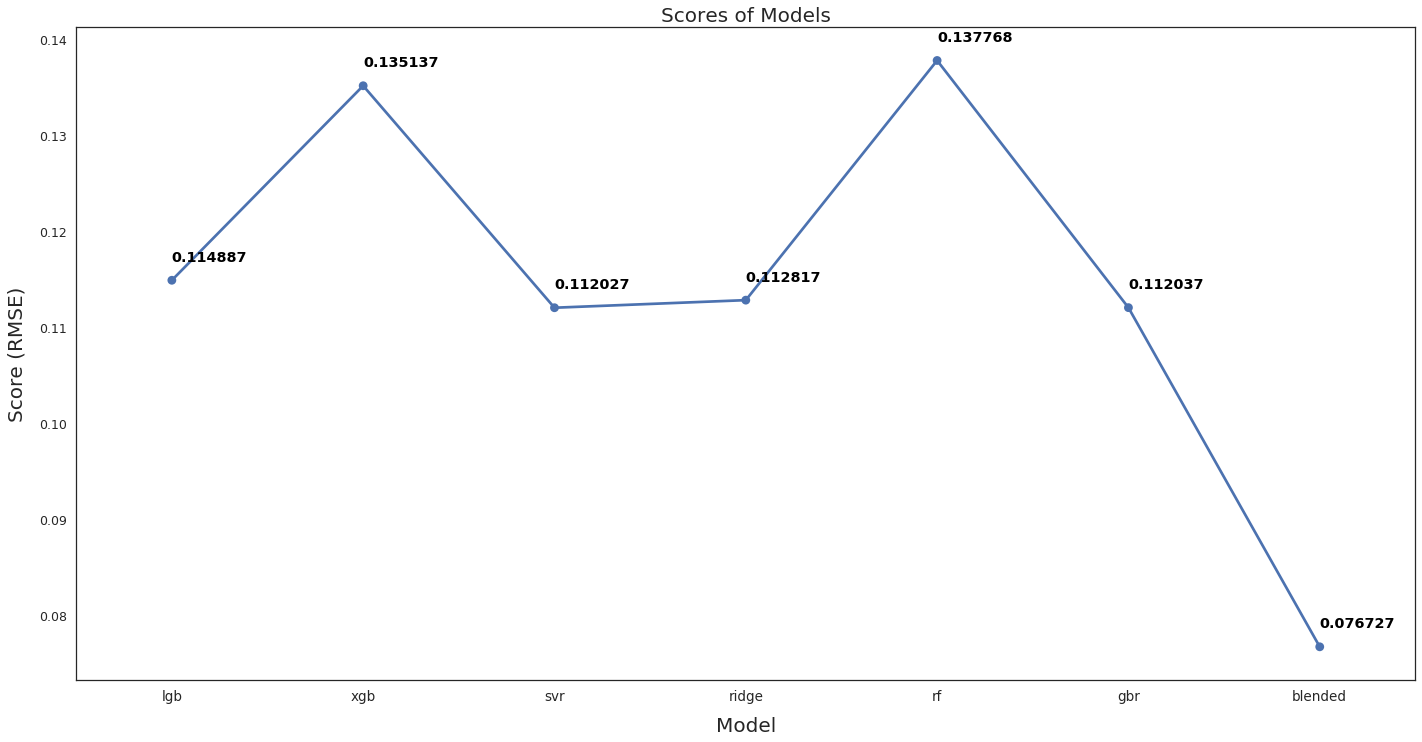

In [81]:
# Plot the predictions for each model
sb.set_style("white")
fig = plt.figure(figsize=(24, 12))

ax = sb.pointplot(x=list(scores.keys()), y=[score for score, _ in scores.values()], markers=['o'], linestyles=['-'])
for i, score in enumerate(scores.values()):
    ax.text(i, score[0] + 0.002, '{:.6f}'.format(score[0]), horizontalalignment='left', size='large', color='black', weight='semibold')

plt.ylabel('Score (RMSE)', size=20, labelpad=12.5)
plt.xlabel('Model', size=20, labelpad=12.5)
plt.tick_params(axis='x', labelsize=13.5)
plt.tick_params(axis='y', labelsize=12.5)

plt.title('Scores of Models', size=20)

plt.show()

In [82]:
predictions = np.floor(np.expm1(blended_predictions(test_val.values)))

In [84]:
submission = pd.DataFrame()
submission['Id'] = test_id
submission['SalePrice'] = predictions
q1 = submission['SalePrice'].quantile(0.0045)
q2 = submission['SalePrice'].quantile(0.99)
submission['SalePrice'] = submission['SalePrice'].apply(lambda x: x if x > q1 else x*0.77)
submission['SalePrice'] = submission['SalePrice'].apply(lambda x: x if x < q2 else x*1.1)

In [85]:
print("Creating Submission File")
submission.to_csv("submission.csv", index=False)

Creating Submission File


In [86]:
submission['SalePrice'] *= 1.001619
submission.to_csv("submission_regression2.csv", index=False)

In [ ]:
l1 = train_val.columns.tolist()

In [ ]:
l2 = test_val.columns.tolist()

In [ ]:
for i in range(len(l1)):
    if l1[i] == l2[i]:
        print(l1[i], " True ", i + 1)
    else:
        print(l1[i], " False")

In [ ]:
l2